<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>


---
## 01. Examples of Image Convolution


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will use a simple image to show how convolution works.

---

---

## The Image

In order to show the effects of convolutional filters, we will use an example image with a size of 32 pixels by 32 pixels with only one channel (grayscale).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/drive/MyDrive/Colab Notebooks/Neural Networks/04. Convolution/grayMario.png')


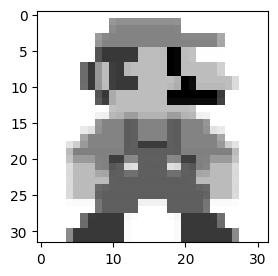

In [2]:
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
np_img = np.asarray(img)
np_img.shape

(32, 32)

In [4]:
np_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

These images are already 'normalized', i.e. the entries in the array are numbers in the range [0,1],

In [5]:
np_img = np_img/255
np_img

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

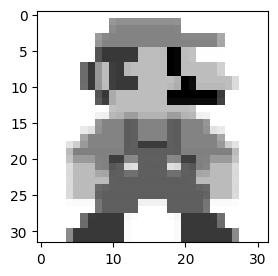

In [6]:
plt.figure(figsize=(3,3))
plt.imshow(np_img, cmap='gray')
plt.show()

## The Convolution



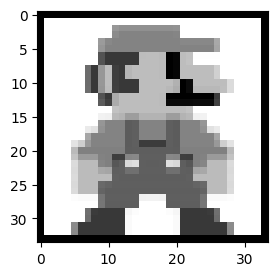

In [7]:
n = len(np_img)

temp_img = np.zeros([n+2,n+2])
temp_img[1:-1,1:-1] = np_img

plt.figure(figsize=(3,3))
plt.imshow(temp_img, cmap='gray')
plt.show()

In [8]:
temp_img.shape

(34, 34)

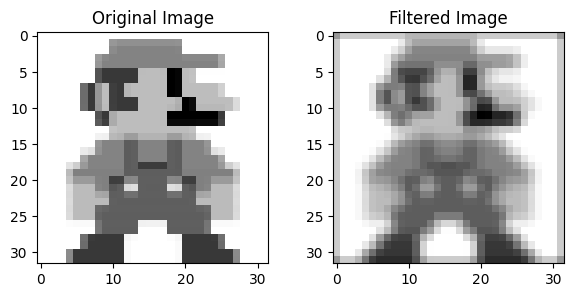

In [9]:
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]])
conv_img = np.zeros([n,n])

for i in range(n):
  for j in range(n):
    conv_img[i,j] = np.sum(np.multiply(kernel,temp_img[i:i+3,j:j+3]))

fig, ax = plt.subplots(1,2, figsize=(7,3))
ax[0].imshow(np_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(conv_img, cmap='gray')
ax[1].set_title('Filtered Image')
plt.show()

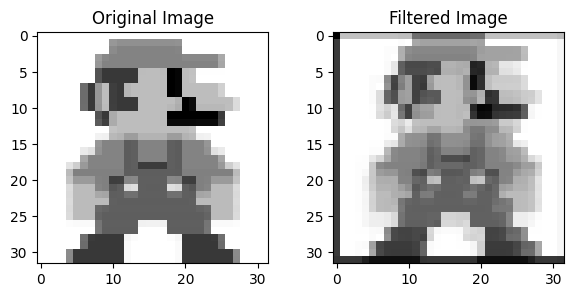

In [12]:
def convol_img(image, kernel):
  n = len(image)
  temp_img = np.zeros([n+2,n+2])
  temp_img[1:-1,1:-1] = image
  conv_img = np.zeros([n,n])

  for i in range(n):
    for j in range(n):
      conv_img[i,j] = np.sum(np.multiply(kernel,temp_img[i:i+3,j:j+3]))

  conv_img = conv_img/np.max(conv_img)
  fig, ax = plt.subplots(1,2, figsize=(7,3))
  ax[0].imshow(image, cmap='gray')
  ax[0].set_title('Original Image')
  ax[1].imshow(conv_img, cmap='gray')
  ax[1].set_title('Filtered Image')
  plt.show()

  return conv_img

kernel = np.array([[1,0,1],
                   [0,1,0],
                   [1,0,1]])
'''
kernel = np.array([[0,0,0],
                   [0,1,0],
                   [0,0,0]])
'''


kernel = np.array([[1,30,1],
                   [0,-5,0],
                   [100,0,np.pi]])

c_img = convol_img(np_img, kernel)

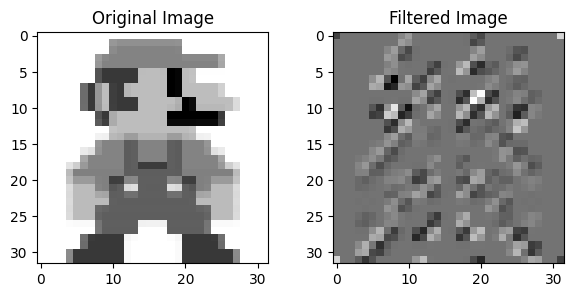

In [19]:
identity = np.array([[0,0,0],
                     [0,1,0],
                     [0,0,0]])

ridge = np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])

sharpen = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

box_blur = (1/9)*np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]])

gauss_blur = (1/16)*np.array([[1,2,1],
                              [2,4,2],
                              [1,2,1]])

h_lines = np.array([[-1,-1,-1],
                    [2,2,2],
                    [-1,-1,-1]])

v_lines = np.array([[-1,2,-1],
                    [-1,2,-1],
                    [-1,2,-1]])

inc_lines = np.array([[-1,-1,2],
                      [-1,2,-1],
                      [2,-1,-1]])

c_img = convol_img(np_img, inc_lines)

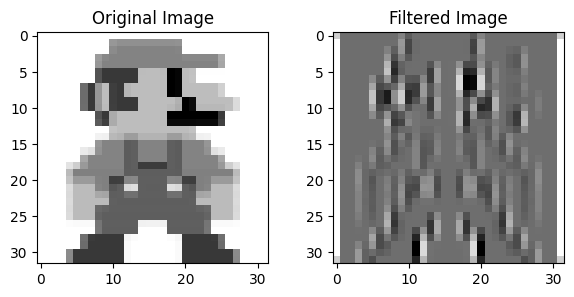

array([[0.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667]])

In [ ]:
convol_img(np_img,v_lines)

In [ ]:
c_img

array([[-0.3478854,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.6957708],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.6957708,  0.       ,  0.       , ...,  0.       ,  0.       ,
        -0.3478854]])